## Requests:

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Sampling Your Data
4. Build Model
    4. a. Try DecisionTree, RandomForest
    4. b. Try other tree-based model like: XGBoost, CatBoost
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What is your main model as well as their params and why?


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

In [1]:
!pip install -U pandas_profiling
!pip install -U pandas
!pip install -U xlrd
!pip install -U catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 23.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=13b5b67c64b4f9c4dfa5b339a43fb97642b06e7180c49ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 39.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.1.2 requires pandas!=1.4.0,<1.6,>1.1, but you have pandas 2.0.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.2 MB/s eta 0:00:00


## Library:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport

from google.colab import drive

drive.mount("/content/drive")

<ipython-input-2-ce8790fa617a>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Mounted at /content/drive


## Read File:

In [3]:
PATH = "/content/drive/MyDrive/Colab Notebooks/HomeWork-churn_rate_prediction.csv"
df = pd.read_csv(PATH)
df.head()

customer_id              Name  age gender   
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F  \
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date   
0     XW0DQ7H         Village  Platinum Membership   2017-08-17  \
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id  ... avg_time_spent   
0                      No    xxxxxxxx  ...         300.63  \
1                       ?    CID21329  ...         306.34   
2                     Yes    CID12313  ...         516.16   
3                     Yes     CID3793  ...          53.27   
4                      No    xxxxxxxx  ...         113.13   

  avg_transaction_value avg_frequency_login_days points_in_wallet   
0              53005.25                     17.0           781.75  \
1              12838.38                     10.0              NaN   
2              21027.00                     22.0           500.69   
3              25239.56                      6.0           567.66   
4              24483.66                     16.0           663.06   

   used_special_discount  offer_application_preference  past_complaint   
0                    Yes                           Yes              No  \
1                    Yes                            No             Yes   
2                     No                           Yes             Yes   
3                     No                           Yes             Yes   
4                     No                           Yes             Yes   

      complaint_status                  feedback churn_risk_score  
0       Not Applicable  Products always in Stock                2  
1               Solved     Quality Customer Care                1  
2  Solved in Follow-up              Poor Website                5  
3             Unsolved              Poor Website                5  
4               Solved              Poor Website                5  

[5 rows x 25 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [5]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [6]:
df.describe()

age  days_since_last_login  avg_time_spent   
count  36992.000000           36992.000000    36992.000000  \
mean      37.118161             -41.915576      243.472334   
std       15.867412             228.819900      398.289149   
min       10.000000            -999.000000    -2814.109110   
25%       23.000000               8.000000       60.102500   
50%       37.000000              12.000000      161.765000   
75%       51.000000              16.000000      356.515000   
max       64.000000              26.000000     3235.578521   

       avg_transaction_value  points_in_wallet  churn_risk_score  
count           36992.000000      33549.000000      36992.000000  
mean            29271.194003        686.882199          3.463397  
std             19444.806226        194.063624          1.409661  
min               800.460000       -760.661236         -1.000000  
25%             14177.540000        616.150000          3.000000  
50%             27554.485000        697.620000          4.000000  
75%             40855.110000        763.950000          5.000000  
max             99914.050000       2069.069761          5.000000

## Data Analysis:

In [7]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]

In [8]:
print('Categorical columns: ',categorical_cols)
print('Numerical columns: ',numerical_cols)

Categorical columns:  ['customer_id', 'Name', 'gender', 'security_no', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'referral_id', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'avg_frequency_login_days', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']
Numerical columns:  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']


In [9]:
print(df[categorical_cols].isnull().sum())
print(df[numerical_cols].isnull().sum())

customer_id                        0
Name                               0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
avg_frequency_login_days           0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64
age                         0
days_since_last_login       0
avg_time_spent              0
avg_transaction_value       0
points_in_wallet         3443
churn_risk_score            0
dtype: int64


In [10]:
ProfileReport(df)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

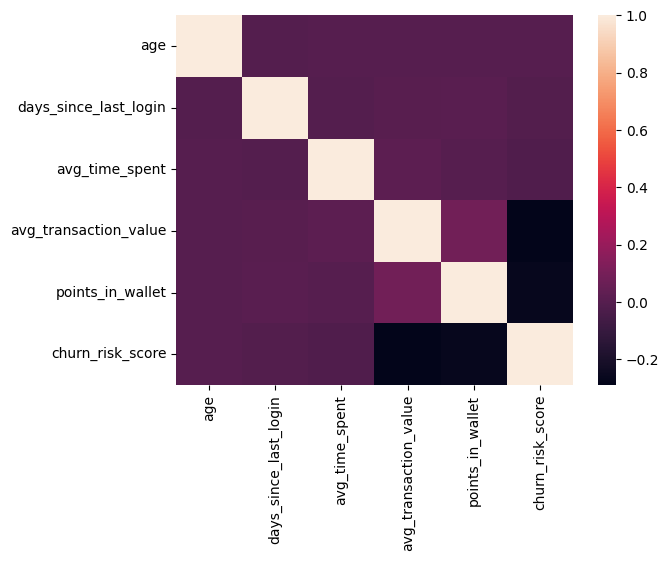

In [13]:
sns.heatmap(df[numerical_cols].corr())

<Axes: xlabel='churn_risk_score', ylabel='Count'>

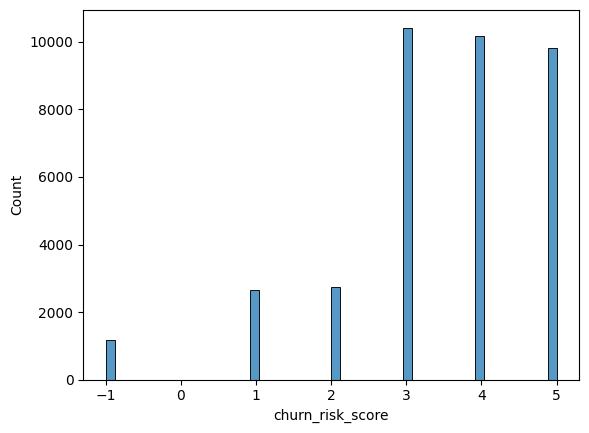

In [15]:
sns.histplot(df , x = 'churn_risk_score')

<Axes: xlabel='gender', ylabel='count'>

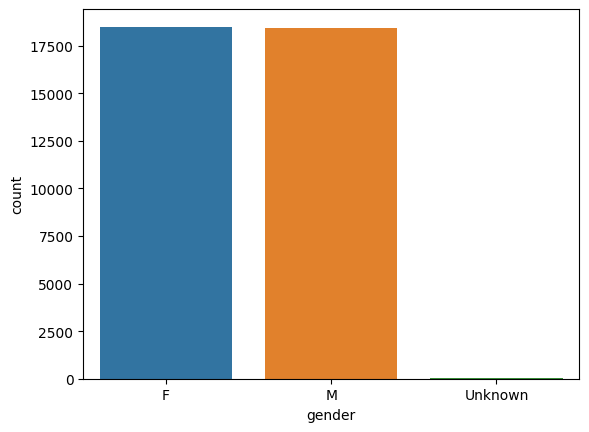

In [16]:
sns.countplot(x = 'gender', data = df)

<Axes: xlabel='region_category', ylabel='count'>

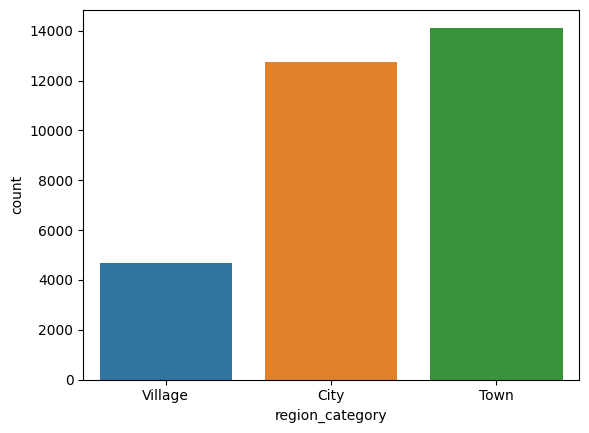

In [17]:
sns.countplot(data =  df , x ='region_category')

## Preprocessing:

In [33]:
import matplotlib.pyplot as plt

In [18]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [19]:
df.isnull().sum().sum()

9159

In [20]:
def preprocessing_data(df):
    if(df.isnull().any().any()==True):
        df.dropna(inplace=True)
    return df

In [21]:
df_copy=df.copy()

In [22]:
df_copy=preprocessing_data(df_copy)

In [23]:
df_copy.drop('customer_id',axis=1,inplace=True)


In [24]:
df_copy.isnull().sum().sum()

0

In [25]:
df_copy.columns

Index(['Name', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [26]:
df_copy[numerical_cols].columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet', 'churn_risk_score'],
      dtype='object')

In [27]:
for i in range(len(df_copy.columns)):
  name=df_copy.columns[i]
  value_counts = df_copy[name].value_counts()
  print(len(value_counts),end=' \t')


28373 	55 	3 	28373 	3 	6 	1096 	3 	9604 	3 	4 	3 	24196 	27 	21050 	28312 	1266 	20977 	2 	2 	2 	5 	9 	6 	

In [28]:
def Value_Count(data):
  for i in range(len(data.columns)):
    name=data.columns[i]
    Value_counts=data[name].value_counts()
    if(len(Value_counts)>10):
      continue
    else:
      print(Value_counts,end='\n##############\n')

In [29]:
Value_Count(df_copy)

gender
F          14203
M          14127
Unknown       43
Name: count, dtype: int64
##############
region_category
Town       12704
City       11402
Village     4267
Name: count, dtype: int64
##############
membership_category
Basic Membership       5897
No Membership          5879
Gold Membership        5208
Silver Membership      4628
Premium Membership     3428
Platinum Membership    3333
Name: count, dtype: int64
##############
joined_through_referral
No     12180
Yes    12021
?       4172
Name: count, dtype: int64
##############
preferred_offer_types
Gift Vouchers/Coupons       9550
Credit/Debit Card Offers    9505
Without Offers              9318
Name: count, dtype: int64
##############
medium_of_operation
Smartphone    10710
Desktop       10610
?              4098
Both           2955
Name: count, dtype: int64
##############
internet_option
Mobile_Data    9491
Wi-Fi          9462
Fiber_Optic    9420
Name: count, dtype: int64
##############
used_special_discount
Yes    15572
No   

In [30]:
def Find_mark(df):
  Name_col=[]
  for name in df.columns:
      if (df[name] == '?').any():
          rows_error = df.loc[df[name] == '?']
          print(f'{name} :{len(rows_error)}')
          Name_col.append(name)
      else:
          continue
  return Name_col

In [31]:
Name_col=Find_mark(df_copy)
Name_col

joined_through_referral :4172
medium_of_operation :4098


['joined_through_referral', 'medium_of_operation']

In [32]:
for name in Name_col:
  unique_values = df_copy[name].unique()
  print(f'{name} : {unique_values}')


joined_through_referral : ['No' 'Yes' '?']
medium_of_operation : ['?' 'Desktop' 'Smartphone' 'Both']


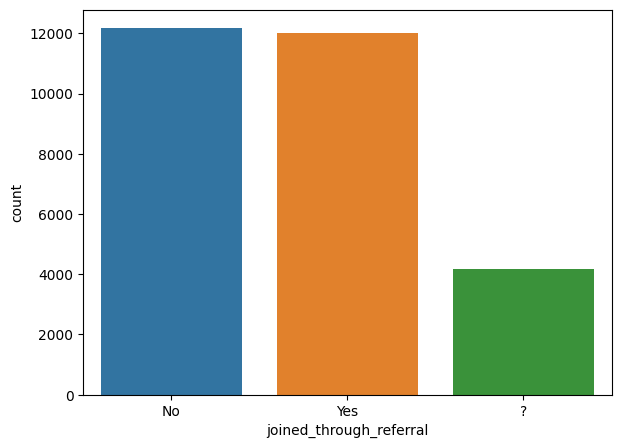

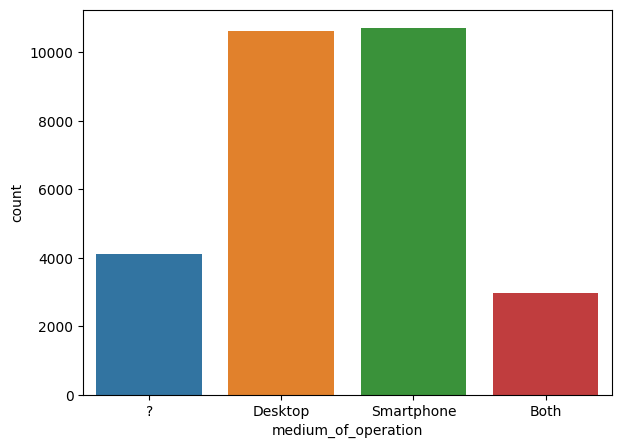

In [35]:
def counplot_mark(df):
  i=1
  for name in Name_col:
    plt.figure(figsize=(15,5))
    plt.subplot(1,len(Name_col),i)
    sns.countplot(x=name, data=df)
    i+=1
  plt.show()
counplot_mark(df_copy)

In [36]:
df_copy = df_copy.replace("?", np.nan)
df_copy = df_copy.dropna()

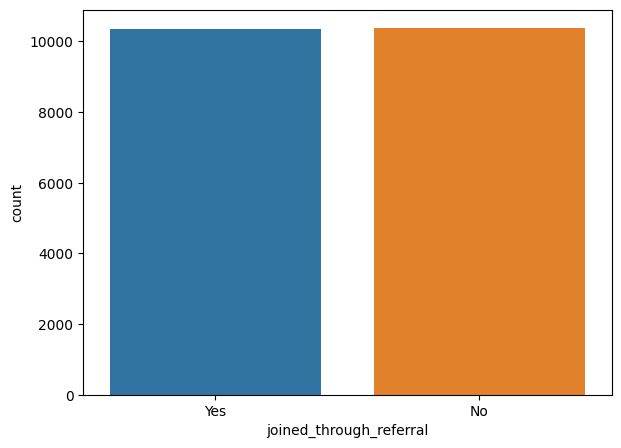

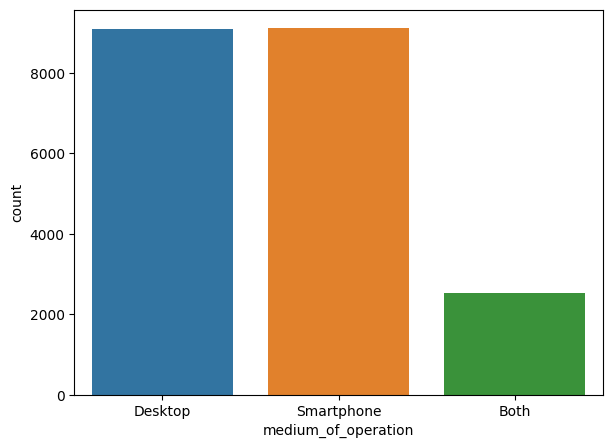

In [37]:
counplot_mark(df_copy)

## Feature Engineering:

In [38]:
df_process=df_copy.copy()

In [40]:
df_process.head()

Name  age gender security_no region_category   
2    Merideth Mcmeen   44      F     1F2TCL3            Town  \
3   Eufemia Cardwell   37      M     VJGJ33N            City   
4       Meghan Kosak   31      F     SVZXCWB            City   
6      Bridget Balog   21      M     R3CX1EA            Town   
10     Mariana Hakes   25      F     OKZ6GDD         Village   

   membership_category joining_date joined_through_referral referral_id   
2        No Membership   2016-11-11                     Yes    CID12313  \
3        No Membership   2016-10-29                     Yes     CID3793   
4        No Membership   2017-09-12                      No    xxxxxxxx   
6      Gold Membership   2015-03-19                     Yes    CID24708   
10    Basic Membership   2016-05-22                     Yes    CID19275   

       preferred_offer_types  ... avg_time_spent avg_transaction_value   
2      Gift Vouchers/Coupons  ...         516.16              21027.00  \
3      Gift Vouchers/Coupons  ...          53.27              25239.56   
4   Credit/Debit Card Offers  ...         113.13              24483.66   
6      Gift Vouchers/Coupons  ...          55.38               8982.50   
10     Gift Vouchers/Coupons  ...         570.23              35119.93   

   avg_frequency_login_days  points_in_wallet  used_special_discount   
2                      22.0            500.69                     No  \
3                       6.0            567.66                     No   
4                      16.0            663.06                     No   
6                      28.0            756.21                    Yes   
10                      8.0            699.70                    Yes   

    offer_application_preference past_complaint     complaint_status   
2                            Yes            Yes  Solved in Follow-up  \
3                            Yes            Yes             Unsolved   
4                            Yes            Yes               Solved   
6                             No            Yes  Solved in Follow-up   
10                           Yes             No       Not Applicable   

                feedback churn_risk_score  
2           Poor Website                5  
3           Poor Website                5  
4           Poor Website                5  
6    No reason specified                3  
10  Poor Product Quality                5  

[5 rows x 24 columns]

In [41]:
def apply_feature_engineering(df):
    for i in range(2,len(categorical_cols)):
      df[categorical_cols[i]] = df[categorical_cols[i]].astype("category").cat.codes
    return df

In [42]:
dfFeauture=apply_feature_engineering(df_process)
dfFeauture.head()

Name  age  gender  security_no  region_category   
2    Merideth Mcmeen   44       0          847                1  \
3   Eufemia Cardwell   37       1        18200                0   
4       Meghan Kosak   31       0        16661                0   
6      Bridget Balog   21       1        15665                1   
10     Mariana Hakes   25       0        14242                2   

    membership_category  joining_date  joined_through_referral  referral_id   
2                     2           680                        1          276  \
3                     2           667                        1         3415   
4                     2           985                        0         7025   
6                     1            77                        1         1794   
10                    0           507                        1         1126   

    preferred_offer_types  ...  avg_time_spent  avg_transaction_value   
2                       1  ...          516.16               21027.00  \
3                       1  ...           53.27               25239.56   
4                       0  ...          113.13               24483.66   
6                       1  ...           55.38                8982.50   
10                      1  ...          570.23               35119.93   

    avg_frequency_login_days  points_in_wallet  used_special_discount   
2                        445            500.69                      0  \
3                        932            567.66                      0   
4                        419            663.06                      0   
6                        463            756.21                      1   
10                       940            699.70                      1   

    offer_application_preference  past_complaint  complaint_status  feedback   
2                              1               1                 3         3  \
3                              1               1                 4         3   
4                              1               1                 2         3   
6                              0               1                 3         0   
10                             1               0                 1         2   

    churn_risk_score  
2                  5  
3                  5  
4                  5  
6                  3  
10                 5  

[5 rows x 24 columns]

<Axes: >

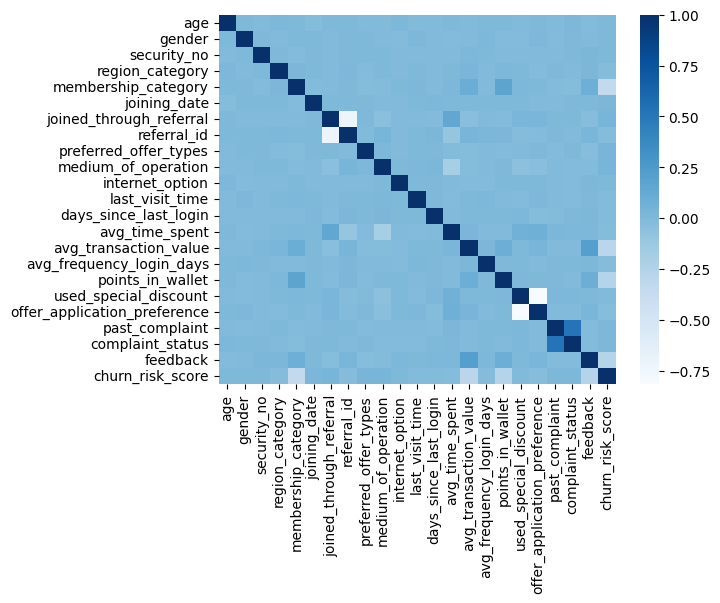

In [43]:
sns.heatmap(dfFeauture[dfFeauture.columns[1:]].corr(),cmap="Blues")

## Model training:

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from catboost import CatBoostClassifier

In [45]:
dfFeauture.drop('Name',axis=1,inplace=True)

In [46]:
dfFeauture.columns

Index(['age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [47]:
def prepare_X_y(df):
    feature_names = df.columns.tolist()
    feature_names.remove("churn_risk_score")
    X = df[feature_names].values
    y = df.churn_risk_score.values
    return X, y
X, y = prepare_X_y(dfFeauture)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Decision Tree:

In [ ]:
clf = DecisionTreeClassifier()
pipe = Pipeline(steps=[("tree", clf)]) 
param_grid = {
    'tree__criterion': ["gini", "entropy", "log_loss"]
    }

search = GridSearchCV(pipe, param_grid, scoring="recall", n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

predicted_label = search.predict(X_test)
print(classification_report(y_test, predicted_label))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


Best parameter (CV score=nan):
{'tree__criterion': 'gini'}
              precision    recall  f1-score   support

          -1       0.04      0.05      0.04       205
           1       0.72      0.70      0.71       473
           2       0.72      0.73      0.73       481
           3       0.87      0.90      0.88      1675
           4       0.67      0.65      0.66      1765
           5       0.71      0.69      0.70      1617

    accuracy                           0.72      6216
   macro avg       0.62      0.62      0.62      6216
weighted avg       0.72      0.72      0.72      6216



### RandomForest:

In [ ]:
clf = RandomForestClassifier(random_state = 1)
pipe = Pipeline(steps=[("tree", clf)])
n_estimators = [70 , 80 , 90 , 100]
param_grid = {
    'tree__n_estimators': n_estimators,
    'tree__criterion': ["gini", "entropy", "log_loss"],
    }
search = GridSearchCV(pipe, param_grid, scoring="recall", n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

predicted_label = search.predict(X_test)
print(classification_report(y_test, predicted_label))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameter (CV score=nan):
{'tree__criterion': 'gini', 'tree__n_estimators': 70}
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       127
           1       0.74      0.83      0.78       313
           2       0.81      0.74      0.78       330
           3       0.87      0.95      0.91      1124
           4       0.67      0.65      0.66      1163
           5       0.70      0.74      0.72      1087

    accuracy                           0.75      4144
   macro avg       0.63      0.65      0.64      4144
weighted avg       0.73      0.75      0.74      4144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGBOOST:

In [ ]:
model_xgb = xgb.XGBClassifier(objective ='multi:softprob',
                              verbose=0, 
                              scoring='f1', 
                             learning_rate=0.001, 
                              subsample=0.5, 
                              n_jobs=-1, 
                             n_estimators=100,
                              max_depth = 10)

In [ ]:
le = LabelEncoder()
le.fit(y_train)
new_y_train = le.transform(y_train)
new_y_test = le.transform(y_test)
model_xgb.fit(X_train, new_y_train, eval_set=[(X_test, new_y_test)])
y_pred = model_xgb.predict(X_test)

[19:52:26] WARNING: ../src/learner.cc:767: 
Parameters: { "scoring", "verbose" } are not used.

[0]	validation_0-mlogloss:1.78982
[1]	validation_0-mlogloss:1.78789
[2]	validation_0-mlogloss:1.78594
[3]	validation_0-mlogloss:1.78400
[4]	validation_0-mlogloss:1.78208
[5]	validation_0-mlogloss:1.78016
[6]	validation_0-mlogloss:1.77827
[7]	validation_0-mlogloss:1.77638
[8]	validation_0-mlogloss:1.77449
[9]	validation_0-mlogloss:1.77259
[10]	validation_0-mlogloss:1.77070
[11]	validation_0-mlogloss:1.76881
[12]	validation_0-mlogloss:1.76692
[13]	validation_0-mlogloss:1.76504
[14]	validation_0-mlogloss:1.76318
[15]	validation_0-mlogloss:1.76132
[16]	validation_0-mlogloss:1.75945
[17]	validation_0-mlogloss:1.75760
[18]	validation_0-mlogloss:1.75576
[19]	validation_0-mlogloss:1.75391
[20]	validation_0-mlogloss:1.75207
[21]	validation_0-mlogloss:1.75025
[22]	validation_0-mlogloss:1.74841
[23]	validation_0-mlogloss:1.74659
[24]	validation_0-mlogloss:1.74477
[25]	validation_0-mlogloss:1.74296
[26]

In [ ]:
print(classification_report(new_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.70      0.84      0.77       313
           2       0.81      0.70      0.75       330
           3       0.87      0.96      0.91      1124
           4       0.78      0.56      0.65      1163
           5       0.68      0.88      0.77      1087

    accuracy                           0.77      4144
   macro avg       0.64      0.66      0.64      4144
weighted avg       0.75      0.77      0.75      4144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### CATBOOST:

In [ ]:
cat_model = CatBoostClassifier(n_estimators=100)
cat_model.fit(X_train , new_y_train , eval_set=[(X_test, new_y_test)])

Learning rate set to 0.275243
0:	learn: 1.2284864	test: 1.2337577	best: 1.2337577 (0)	total: 119ms	remaining: 11.7s
1:	learn: 1.0160302	test: 1.0198711	best: 1.0198711 (1)	total: 189ms	remaining: 9.24s
2:	learn: 0.8745258	test: 0.8774414	best: 0.8774414 (2)	total: 252ms	remaining: 8.16s
3:	learn: 0.7944327	test: 0.7974891	best: 0.7974891 (3)	total: 311ms	remaining: 7.47s
4:	learn: 0.7374769	test: 0.7402257	best: 0.7402257 (4)	total: 375ms	remaining: 7.12s
5:	learn: 0.6947339	test: 0.6958770	best: 0.6958770 (5)	total: 446ms	remaining: 6.99s
6:	learn: 0.6584654	test: 0.6586150	best: 0.6586150 (6)	total: 517ms	remaining: 6.87s
7:	learn: 0.6307818	test: 0.6296833	best: 0.6296833 (7)	total: 572ms	remaining: 6.57s
8:	learn: 0.6009937	test: 0.6001089	best: 0.6001089 (8)	total: 633ms	remaining: 6.4s
9:	learn: 0.5871664	test: 0.5865968	best: 0.5865968 (9)	total: 701ms	remaining: 6.31s
10:	learn: 0.5711796	test: 0.5710665	best: 0.5710665 (10)	total: 759ms	remaining: 6.14s
11:	learn: 0.5565015	te

In [ ]:
y_pred = model_xgb.predict(X_test)
print(classification_report(new_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.70      0.84      0.77       313
           2       0.81      0.70      0.75       330
           3       0.87      0.96      0.91      1124
           4       0.78      0.56      0.65      1163
           5       0.68      0.88      0.77      1087

    accuracy                           0.77      4144
   macro avg       0.64      0.66      0.64      4144
weighted avg       0.75      0.77      0.75      4144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusion:

* **F1_Score** is use a main metric because we want a model that doesn't eliminate cases where customers have left, optimizes its ability to correctly predict that number and come up with a solution.
* Based on the results of accuracy, precision, recall and F1-score on the test set, it can be seen that XGBoost and CatBoost both give better results than Decision Tree and Random Forest models. So i think XGBoost and Catboot are the best model choice in my opinion